In [1]:
import os
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from matplotlib import gridspec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from os import system
from IPython.display import Image


warnings.filterwarnings('ignore')                                       # Ignore/Do not display warnings

main_data = pd.read_csv('credit.csv')

In [2]:
main_data.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [3]:
main_data.shape

(1000, 17)

In [4]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [5]:
for col_name in main_data.columns:
    if main_data[col_name].dtype == 'object':
        main_data[col_name] = pd.Categorical(main_data[col_name])
        
main_data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [6]:
def CountUniqueValues(col_name):
    print(f"\n\n======Unique Values count for: '{col_name}'========\n\n")
    for unique_col_value in  main_data[col_name].unique().tolist():
        total_count = main_data[col_name].count()
        unique_values_count = main_data[main_data[col_name] == unique_col_value][col_name].count()
        percentage = str(round((unique_values_count/total_count) * 100, 2))
        print(f"{unique_col_value} \t: {unique_values_count} ({percentage}%)")
    print(f"\n\n====================================================\n\n")

In [7]:
for col_name in main_data.columns:
    print(main_data[col_name].value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
7       5
39      5
45      5
14      4
13      4
28      3
33      3
54      2
22      2
16      2
40      1
47      1
26      1
5       1
72      1
Name: months_loan_duration, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
1258    3
1262    3
1393    3
1478    3
1275    3
       ..
759     1
760     1
763     1
2812    1
6143    1
Name: amount, Length: 921, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM

In [8]:
# replace columns with  integers in the appropreate order
replace_struct = {
    "checking_balance"    : {"< 0 DM": 1, "1 - 200 DM": 2, "> 200 DM": 3, "unknown": -1},
    "credit_history"      : {"critical": 1, "poor": 2, "good": 3, "very good": 4, "perfect": 5},
    "savings_balance"     : {"< 100 DM": 1, "100 - 500 DM": 2, "500 - 1000 DM": 3, "> 1000 DM": 4, "unknown": -1},
    "employment_duration" : {"unemployed": 1, "< 1 year": 2, "1 - 4 years": 3, "4 - 7 years":4, "> 7 years": 5},
    "default"             : {"no":0, "yes":1},
    "phone"               : {"no":0, "yes":1}
}

oneHotCols = ["purpose", "housing", "other_credit","job"]

In [9]:
main_data = main_data.replace(replace_struct)
main_data = pd.get_dummies(main_data, columns=oneHotCols)
main_data.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [10]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int64
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int64
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int64
 5   employment_duration           1000 non-null   int64
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  dependents                    1000 non-null   int64
 11  phone                         1000 non-null   int64
 12  default                       1000 non-null   int64
 13  purpose_business              1000

In [11]:
X = main_data.drop("default", axis=1)
Y = main_data.pop("default")
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [12]:
dTree = DecisionTreeClassifier(criterion= 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [13]:
print(f"Training Score :{dTree.score(x_train, y_train)}")
print(f"Test Score : {dTree.score(x_test, y_test)}")

Training Score :1.0
Test Score : 0.6933333333333334


In [14]:
# check number of positives
Y.sum(axis = 0)

300

In [34]:
def DisplayConfusionMatrix(model, y_actual, labels=[1,0]):
    y_predict = model.predict(x_test)
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    confusion_matix_df = pd.DataFrame(
        confusion_matrix,
        index   = [i for i in ["Actual No", "Actual Yes"]],
        columns = [i for i in ["Predicted - No", "Predicted - Yes"]])
    
    group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
    group_percetages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percetages)]
    labels = np.array(labels).reshape(2, 2)
    plt.figure(figsize= (10,7))
    sns.heatmap(confusion_matix_df, annot=labels,fmt='')
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    
def DisplayRecallScore(model):
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))


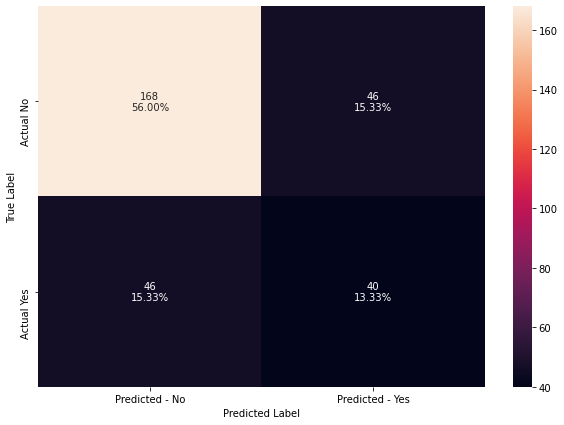

In [35]:
DisplayConfusionMatrix(dTree, y_test)

In [36]:
DisplayRecallScore(dTree)

Recall on training set :  1.0
Recall on test set :  0.46511627906976744


In [37]:
feature_names = list(X.columns)
print(feature_names)

['checking_balance', 'months_loan_duration', 'credit_history', 'amount', 'savings_balance', 'employment_duration', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents', 'phone', 'purpose_business', 'purpose_car', 'purpose_car0', 'purpose_education', 'purpose_furniture/appliances', 'purpose_renovations', 'housing_other', 'housing_own', 'housing_rent', 'other_credit_bank', 'other_credit_none', 'other_credit_store', 'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled']


In [ ]:
plt.figure(figsize=(20,30))
tree